## K Means Clustering Examples and Visualization

K Means is an EM algorithm, which means that the algorithm alternated between two steps, expectation and maximization, till the centroids converge. 

K Means is primarily used for unlabeled data, and has many applications such as customer segmentation, as well as insurance fraud. 

K Means returns k centroids for the data, and k clusters can be made from the data by assigning each data point to one of the k centroids, whichever is nearest. 

Mathematically, K Means alternates between two steps. To initialize, we pick k random points as the k centroids. Then, we determine the cluster partitions - this is done simply by assigning every data point to the nearest centroid.This would be the expectation step. Next, for each of these clusters that are determined, we determine the centroids for these clusters, which is the maximixation step (technically minimizing the sum of distance from the centroid).

We'll look at an example using scikit-learn's out of the box method for K Means Clustering.

Let's start with importing some necessary modules/packages.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Next let's make some data so we can apply K Means.

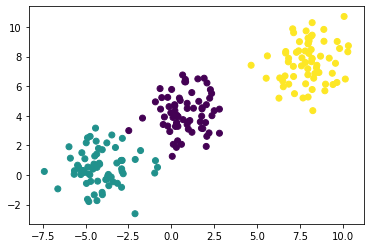

In [7]:
# Let's make some data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 1.2, random_state = 3)

plt.scatter(X[:,0], X[:,1], marker = 'o', c = y)
plt.show()

This data is colored by blob due to the make_blobs method returning labels for the data. However, we won't use these labels at all for K Means, but can use it at the end to evaluate the algorithm's results.

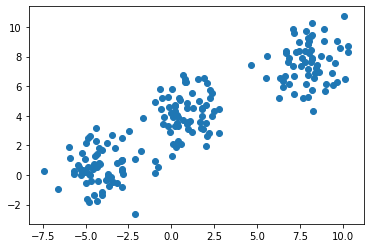

In [8]:
# Here's what we'll be using / how K Means will see it

plt.scatter(X[:,0], X[:,1], marker = 'o')
plt.show()

In [10]:
# The labels to compare to later
y

array([1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 2])

Now let's run K Means

In [12]:
km = KMeans(n_clusters = 3, max_iter = 100)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

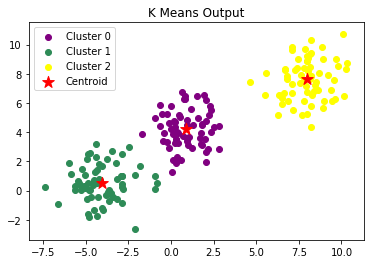

In [21]:
centroids = km.cluster_centers_
labels = km.labels_

plt.scatter(X[labels == 0, 0], X[labels == 0, 1],
            c='purple', label='Cluster 0')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1],
            c='seagreen', label='Cluster 1')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1],
            c='yellow', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s = 150,
            label='Centroid')
plt.legend()
plt.title("K Means Output")
plt.show()

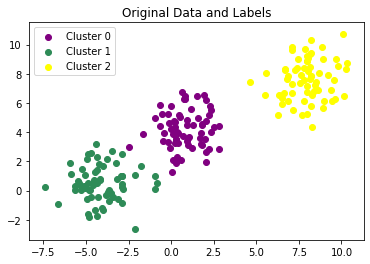

In [25]:
# Let's look at the original data again and the labels
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='purple', label='Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='seagreen', label='Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1],
            c='yellow', label='Cluster 2')
plt.legend()
plt.title("Original Data and Labels")
plt.show()

The K Means result look fairly good, let's evaluate how well they classified the data.

In [33]:
# Find accuracy
accuracy = (np.sum(labels == y) / len(y)) * 100
print("Accuracy of K Means for this data: " + str(accuracy) + "%")

Accuracy of K Means for this data: 99.5%


So overall, it did really well! Let's also consider some common pitfalls of K Means Clustering via some examples.

### Common Pitfalls of K Means Clustering

The following examples show how issues such as incorrect value for k (as it is a hyperparameter the algorithm doesn't set the correct k), anisotropicly distributed clusters, and unequal variance amongst clusters. Another scenario, different sizes for the clusters, doesn't break K Means and the algorithm returns good clusters for the data.

All of these can be seen below:

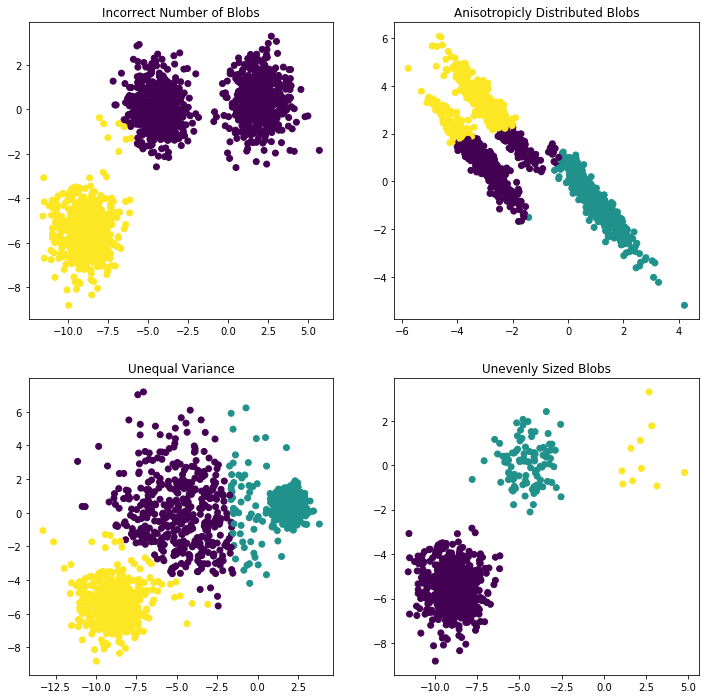

In [34]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

Credit:
K Means Assumptions Visual - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py